Nama : Nabilah Sofieyanti

Proyek Akhir : Membuat Model Sistem Rekomendasi

Machine Learning Terapan

## Import Library

Langkah pertama yang dilakukan adalah import library yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset

Data yang digunakan adalah dataset yang bersumber dari Kaggle berjudul "Disney+ Movies and TV Shows". Dataset ini memiliki 1450 record dan 12 variabel. 

In [2]:
data = pd.read_csv('/content/disney_plus_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


## Data Understanding

Dilakukan beberapa exploratory data sebagai berikut :

### Deskripsi Variabel

Deskripsi variabel-variabel dalam dataset yang digunakan adalah sebagai berikut:
- show_id: kode film yang unik 
- type: tipe Movie/TV Show
- title: judul film
- director: nama director
- cast: nama cast film
- country: asal negara produksi film
- data_added: tanggal ditambahkan di Disney+
- release_year: tahun rilis film
- rating: rating film
- duration: total durasi film
- listed_in: genre film
- description: sinopsis film





### Tipe Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Hasil fungsi info() menunjukan seluruh tipe variabel adalah object atau string kecuali variabel release_year yang merupakan integer

### Pengecekan Missing Value

In [4]:
data.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Dilakukan cek missing value, ternyata pada variabel director, cast, dan country terdapat missing value.

### Melihat listed_in(genre) unik dari film

In [5]:
print(data['listed_in'].unique())

['Animation, Family' 'Comedy' 'Animation, Comedy, Family' 'Musical'
 'Docuseries, Historical, Music' 'Biographical, Documentary'
 'Action-Adventure, Superhero' 'Docuseries, Reality, Survival'
 'Animals & Nature, Docuseries, Family' 'Comedy, Family, Musical'
 'Documentary' 'Comedy, Family, Music' 'Documentary, Family'
 'Action-Adventure, Animals & Nature, Docuseries' 'Animals & Nature'
 'Animation' 'Animation, Kids' 'Comedy, Coming of Age, Drama'
 'Comedy, Family, Fantasy' 'Animation, Comedy, Drama'
 'Animation, Family, Fantasy' 'Action-Adventure, Animation, Comedy'
 'Comedy, Family' 'Action-Adventure, Comedy, Family' 'Lifestyle' 'Movies'
 'Action-Adventure, Science Fiction'
 'Action-Adventure, Fantasy, Superhero' 'Coming of Age, Music'
 'Animation, Drama' 'Concert Film, Music'
 'Animation, Comedy, Coming of Age' 'Animation, Comedy'
 'Animation, Crime, Family' 'Science Fiction' 'Action-Adventure, Fantasy'
 'Comedy, Fantasy, Kids' 'Action-Adventure, Comedy, Kids'
 'Drama, Family, Fantasy

### Visualisasi Data Variabel Type

Text(0.5, 1.0, 'Film Types')

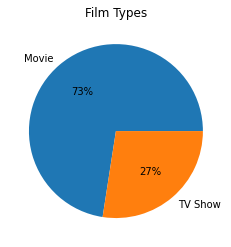

In [6]:
type_film = data['type'].value_counts()

ax=plt.axes()
ax.pie(x=type_film.values,
        labels=data['type'].unique(),
        autopct='%1.0f%%')

ax.set_title('Film Types')

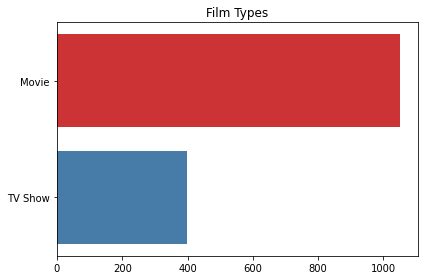

In [7]:
type_film_count = data['type'].value_counts()

sns.barplot(x=type_film_count.values,
            y=type_film_count.index,
            palette='Set1').set_title('Film Types')

plt.tight_layout()
plt.show()

Dilakukan visualisasi data untuk type film. Menggunakan barchart dan pie chart. Dikarenakan hanya ada dua tipe film maka akan cocok jika menggunakan pie chart. Insight : Hasilnya jumlah type movie lebih banyak yaitu daripada TV Show dengan persentase masing-masing 73% dan 27%.

## Data Preparation

### Duplikasi Data

Dilakukan duplikasi data agar dataset asli tidak terkontaminasi dan agar mudah dan bisa digunakan kembali jika dibutuhkan untuk pengembangan model. Dataframe yang baru bernama df yang merupakan hasil duplikasi.

In [8]:
df = data.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### Data Cleaning

Karena untuk membuat model sistem rekomendasi dalam masalah ini hanya membutuhkan variabel title dan listed_in (genre) maka variabel lainnya dapat dihapus. Variabel yang dihapus yaitu variabel show_id, type, director, cast, country, date_added, release_year, rating, duration, dan description.

In [9]:
df = df.drop(columns=['show_id', 'type', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'description'])
df

,title,listed_in
0,Duck the Halls: A Mickey Mouse Christmas Special,"Animation, Family"
1,Ernest Saves Christmas,Comedy
2,Ice Age: A Mammoth Christmas,"Animation, Comedy, Family"
3,The Queen Family Singalong,Musical
4,The Beatles: Get Back,"Docuseries, Historical, Music"
...,...,...
1445,X-Men Origins: Wolverine,"Action-Adventure, Family, Science Fiction"
1446,Night at the Museum: Battle of the Smithsonian,"Action-Adventure, Comedy, Family"
1447,Eddie the Eagle,"Biographical, Comedy, Drama"
1448,Bend It Like Beckham,"Buddy, Comedy, Coming of Age"


Kembali pengecekan missing value pada data yang baru, tidak ada missing value sehingga proses data cleaning selesai

In [10]:
df.isna().sum()

title        0
listed_in    0
dtype: int64

### Data Transform

Mengonversi data 'title' menjadi dalam bentuk list

In [11]:
title = df['title'].tolist()
print(len(title))

1450


## Modeling and Result

### TF-IDF Vectorizer

Sistem rekomendasi akan dibangun berdasarkan genre dengan TF-IDF Vectorizer

In [12]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data listed_in
tf.fit(df['listed_in']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'age',
 'animals',
 'animation',
 'anime',
 'anthology',
 'biographical',
 'buddy',
 'comedy',
 'coming',
 'competition',
 'concert',
 'cop',
 'crime',
 'dance',
 'disaster',
 'documentary',
 'docuseries',
 'drama',
 'espionage',
 'family',
 'fantasy',
 'fiction',
 'film',
 'game',
 'historical',
 'kids',
 'lifestyle',
 'medical',
 'melodrama',
 'movies',
 'music',
 'musical',
 'mystery',
 'nature',
 'of',
 'opera',
 'parody',
 'police',
 'reality',
 'romance',
 'romantic',
 'science',
 'series',
 'show',
 'soap',
 'sports',
 'spy',
 'superhero',
 'survival',
 'talk',
 'thriller',
 'travel',
 'variety',
 'western']

Melakukan fit lalu ditransformasikan ke bentuk matrik. Matrik yang kita miliki berukuran (818, 39). Nilai 818 merupakan ukuran data dan 39 merupakan matrik genre

In [13]:
tfidf_matrix = tf.fit_transform(df['listed_in']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(1450, 56)

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [14]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.41318279, ..., 0.        , 0.        ,
         0.        ],
        [0.3914842 , 0.3914842 , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, membuat matriks TF-IDF untuk beberapa title dan genre

In [15]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df.title
).sample(22, axis=1).sample(10, axis=0)

,parody,science,musical,cop,animals,action,talk,animation,adventure,spy,...,fiction,police,documentary,survival,western,coming,thriller,nature,soap,dance
title,,,,,,,,,,,,,,,,,,,,,
Marvel Studios: Expanding the Universe,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.862290,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
102 Dalmatians,0.0,0.000000,0.0,0.0,0.536577,0.395284,0.0,0.000000,0.395284,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.536577,0.0,0.0
Eddie's Million Dollar Cook-off,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.415797,0.0,0.000000,0.0,0.0
The Reluctant Dragon,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.589083,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
X-Men: The Last Stand,0.0,0.587204,0.0,0.0,0.000000,0.338133,0.0,0.000000,0.338133,0.0,...,0.587204,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Disneynature Monkey Kingdom,0.0,0.000000,0.0,0.0,0.533579,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.565828,0.0,0.0,0.000000,0.0,0.533579,0.0,0.0
The Adventures of Huck Finn,0.0,0.000000,0.0,0.0,0.000000,0.316002,0.0,0.000000,0.316002,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.431068,0.0,0.000000,0.0,0.0
Women Of Impact: Changing The World,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.587490,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Marvel Studios' Ant-Man,0.0,0.582221,0.0,0.0,0.000000,0.335264,0.0,0.000000,0.335264,0.0,...,0.582221,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


### Cosine Similarity

Menghitung similarity degree antar title dengan teknik cosine similarity

In [16]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.80152001, ..., 0.        , 0.        ,
        0.26363077],
       [0.        , 1.        , 0.59796795, ..., 0.33512806, 0.28171419,
        0.        ],
       [0.80152001, 0.59796795, 1.        , ..., 0.20039584, 0.16845606,
        0.21130533],
       ...,
       [0.        , 0.33512806, 0.20039584, ..., 1.        , 0.09441033,
        0.        ],
       [0.        , 0.28171419, 0.16845606, ..., 0.09441033, 1.        ,
        0.        ],
       [0.26363077, 0.        , 0.21130533, ..., 0.        , 0.        ,
        1.        ]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title

In [17]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1450, 1450)


title,Mickey Mouse Funhouse,Teacher's Pet,Bambi,Gordon Ramsay: Uncharted,Toy Story Toons: Partysaurus Rex
title,,,,,
Disney Special Agent Oso: Three Healthy Steps (Shorts),0.784416,0.236721,0.184422,0.248412,0.236721
Born Wild: The Next Generation,0.000000,0.000000,0.000000,0.000000,0.000000
The Search for Santa Paws,0.000000,0.203659,0.698518,0.000000,0.203659
Brink!,0.000000,0.000000,0.346871,0.000000,0.000000
Tom and Huck,0.000000,0.191352,0.000000,0.194879,0.191352
Enchanted,0.000000,0.541061,0.190702,0.000000,0.541061
Andi Mack,0.000000,0.186642,0.408752,0.000000,0.186642
Disney My Music Story: Perfume,0.000000,0.000000,0.000000,0.000000,0.000000
Kazaam,0.000000,0.536807,0.189203,0.299367,0.536807


Hasil diatas menunjukan kesamaan antar title. Dapat dilihat misalnya untuk 'BURN-E' dan 'Dr. Seuss' Horton Hears a Who!' menghasilkan nilai 1 maka kedua title ini similar. 

Kemudian membuat fungsi rekomendasi untuk menghasilkan keluaran 10-top recommendations berdasarkan kesamaan genre

In [18]:
def film_recommendations(title, similarity_data=cosine_sim_df, items=df[['title', 'listed_in']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop title agar title yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Uji coba langsung dilakukan dengan memanggil fungsi rekomendasi yang sudah dibuat sebelumnya dengan memasukan title yang pengguna tonton atau pengguna sukai

In [19]:
#menemukan informasi film dengan title inputan
df[df.title.eq('Aquamarine')]

,title,listed_in
1443,Aquamarine,"Comedy, Coming of Age, Fantasy"


Misalkan title input dengan title 'Aquamarine'. Title judul tersebut bergenre Comedy, Coming of Age, Fantasy.

In [20]:
# Mendapatkan rekomendasi film yang mirip dengan title inputan
film_recommendations('Aquamarine')

,title,listed_in
0,That's So Raven,"Comedy, Coming of Age, Fantasy"
1,Luck of the Irish,"Comedy, Coming of Age, Fantasy"
2,The Ultimate Christmas Present,"Comedy, Coming of Age, Fantasy"
3,Life-Size 2,"Comedy, Coming of Age, Fantasy"
4,The Wizards Return: Alex vs. Alex,"Comedy, Coming of Age, Fantasy"
5,The Swap,"Comedy, Coming of Age, Fantasy"
6,"Up, Up and Away","Comedy, Coming of Age, Fantasy"
7,Wizards of Waverly Place,"Comedy, Coming of Age, Fantasy"
8,Disney Avalon High,"Coming of Age, Fantasy"
9,Miss Peregrine's Home for Peculiar Children,"Coming of Age, Fantasy"


Hasil rekomendasi sesuai dengan genre pada title input yaitu Comedy, Coming of Age, Fantasy.

## Evaluation

Untuk evaluasi model yang telah dibuat, menguji keakuratan digunakan metrik **precision** dengan mengukur jumlah prediksi benar yang dibuat.

In [21]:
feature_recomendation = film_recommendations('Aquamarine')

In [22]:
feature = df[df['title'] == 'Aquamarine']
feature

,title,listed_in
1443,Aquamarine,"Comedy, Coming of Age, Fantasy"


In [23]:
get_feature_listed_in=[]
for i in range(len(feature.listed_in)):
    for x in feature.listed_in.str.split(','):
        if x not in get_feature_listed_in:
            get_feature_listed_in.append(x)

In [24]:
get_feature_listed_in

[['Comedy', ' Coming of Age', ' Fantasy']]

In [25]:
feature_recomendation

,title,listed_in
0,That's So Raven,"Comedy, Coming of Age, Fantasy"
1,Luck of the Irish,"Comedy, Coming of Age, Fantasy"
2,The Ultimate Christmas Present,"Comedy, Coming of Age, Fantasy"
3,Life-Size 2,"Comedy, Coming of Age, Fantasy"
4,The Wizards Return: Alex vs. Alex,"Comedy, Coming of Age, Fantasy"
5,The Swap,"Comedy, Coming of Age, Fantasy"
6,"Up, Up and Away","Comedy, Coming of Age, Fantasy"
7,Wizards of Waverly Place,"Comedy, Coming of Age, Fantasy"
8,Disney Avalon High,"Coming of Age, Fantasy"
9,Miss Peregrine's Home for Peculiar Children,"Coming of Age, Fantasy"


In [26]:
for i in get_feature_listed_in[0]:
  print(i + ": " + str((
      (feature_recomendation['listed_in'].str.contains(i).count()/feature_recomendation['listed_in'].count())*100)
  ))

Comedy: 100.0
 Coming of Age: 100.0
 Fantasy: 100.0


Kesimpulan : Dari hasil 10 rekomendasi film diatas dan hasil pengukuran kinerja model menunjukan bahwa 100% akurat.